
## Baloon Marketing
The small city of Baloonfield has a total number of 8,000 families. Each family lives in a house. These houses are distributed over a square shaped area of 5000 by 5000 meters by the following distribution: 1) 1⁄4 of the houses are distributed normally (mean in center) in a 2000-by-2000 square in the center. With SD=500 meters. 2) The remaining 3⁄4 are distributed normally (mean in center) all over the city with SD=1250 meters. <br>

Baloon, as an online bank, wants to see how much people spend on transportation to a regular bank. Assume the banks are located in the following locations: <br>
A: 2000, 2500 <br>
B: 4200, 4000 <br>
C: 3500,500 <br>
D: 1000,4200 <br>
E: 700,500 <br>

When going to a bank, people choose the nearest bank available. If it is less than 500 meters away, it would cost 1 unit of money to get there, if it is less than a kilometer away it costs 3 and otherwise it costs 5 units of money to get there. Using this information, answer the following:
1) In which areas of the city should Baloon focus on advertising about how using Baloon would decrease transportation costs more? Provide a heatmap.
2) Where is the best location to build a new bank to minimize the transportation costs? Providing a heatmap of a measure of “goodness of location” is a plus.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('coolwarm')
sns.set(rc= {'image.cmap': 'coolwarm'})
rcParams['figure.figsize'] = 15,15
sns.set(rc={'figure.figsize':(15,15)})

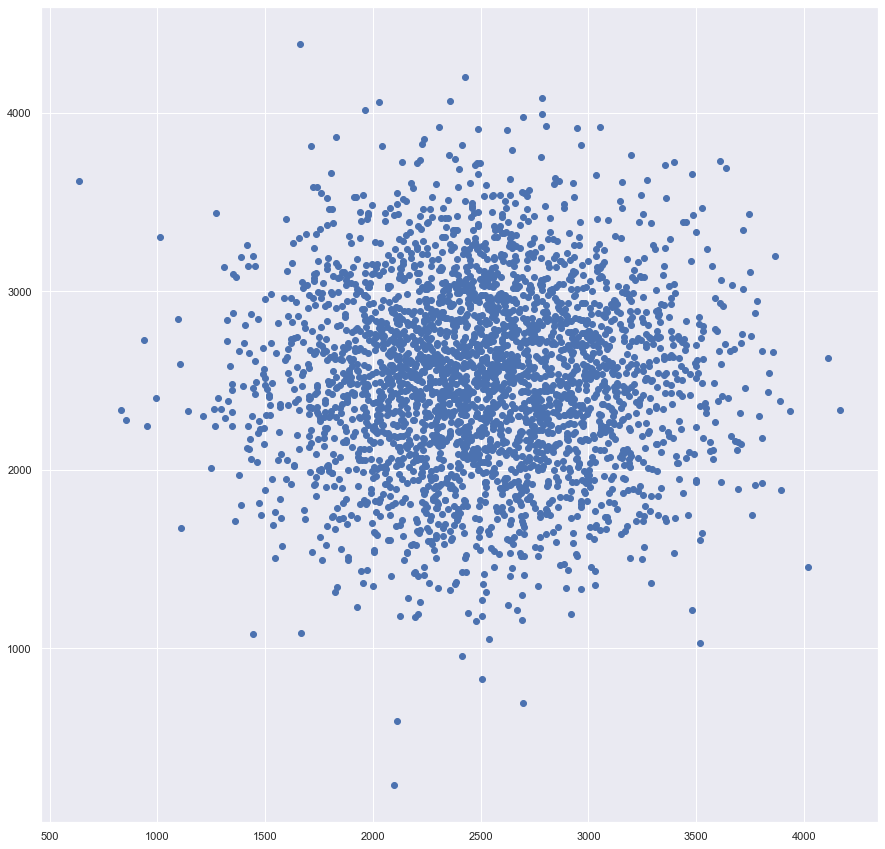

In [2]:
I = np.identity(2)
sd_dist1 = 500
cov_dist1 = I*(np.square(sd_dist1))
dist1 = np.random.multivariate_normal(mean=[2500,2500],cov=cov_dist1,size=3000)

plt.plot(dist1[:,0],dist1[:,1],'bo')

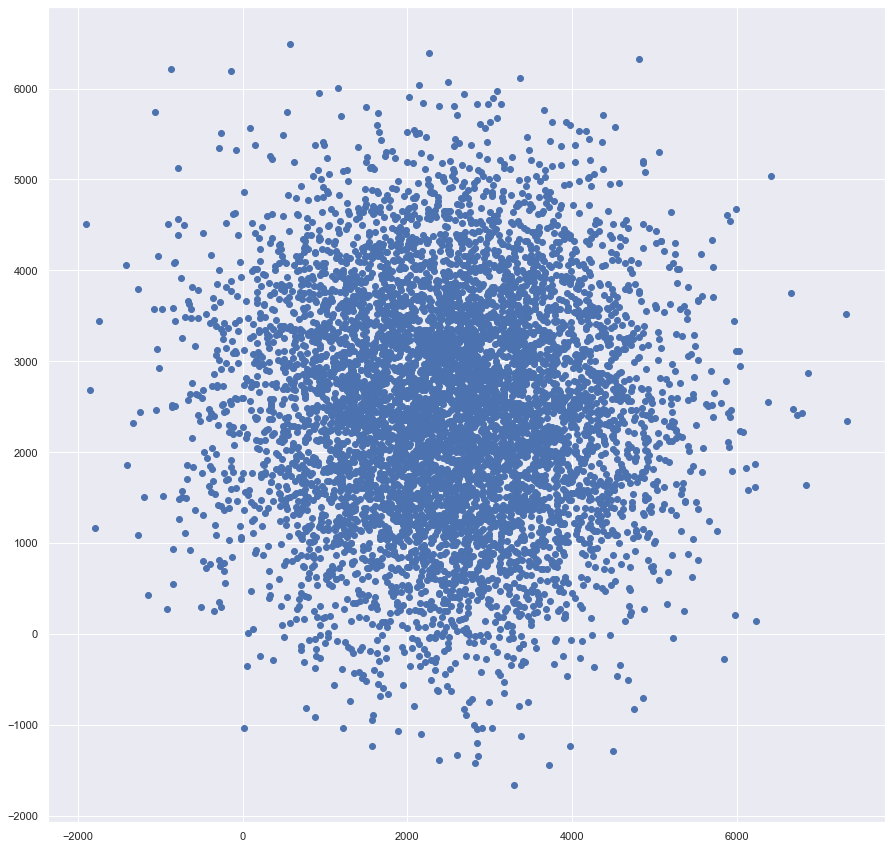

In [3]:
sd_dist2 = 1250
cov_dist2 = I*(np.square(sd_dist2))
dist2 = np.random.multivariate_normal(mean=[2500,2500],cov=cov_dist2,size=7000)

plt.plot(dist2[:,0],dist2[:,1],'bo')

In [4]:
df_dist1 = pd.DataFrame(dist1, columns = ['x','y'])
df_dist2 = pd.DataFrame(dist2, columns = ['x','y'])

df_dist1 = df_dist1[(df_dist1['x']>=1500) & (df_dist1['x']<=3500) & (df_dist1['y']>=1500) & (df_dist1['y']<=3500)]
df_dist2 = df_dist2[(df_dist2['x']>=0) & (df_dist2['x']<=5000) & (df_dist2['y']>=0) & (df_dist2['y']<=5000)]

df_dist1 = df_dist1.iloc[:2000]
df_dist2 = df_dist2.iloc[:6000]

In [5]:
df_dist1.describe()

,x,y
count,2000.000000,2000.000000
mean,2500.595135,2508.112176
std,444.376284,445.043747
min,1500.908592,1505.490399
25%,2186.199859,2190.591047
50%,2489.115128,2520.573719
75%,2826.712445,2831.298235
max,3499.755847,3494.525140


In [6]:
df_dist2.describe()

,x,y
count,6000.000000,6000.000000
mean,2508.588407,2497.013112
std,1101.106823,1097.313595
min,0.187296,8.869727
25%,1699.153978,1684.303060
50%,2514.150153,2493.733783
75%,3313.918827,3292.927626
max,4996.424444,4994.823080


In [7]:
df_dist1['distribution']= 'Distribution 1'
df_dist2['distribution']= 'Distribution 2'
df_house = df_dist1.append(df_dist2, ignore_index=True).drop_duplicates().reset_index(drop=True)

In [8]:
df_house

,x,y,distribution
0,2987.779594,3025.692961,Distribution 1
1,2046.886125,2682.102728,Distribution 1
2,2555.025918,2473.375049,Distribution 1
3,2685.836639,1868.064605,Distribution 1
4,2550.718037,2108.855146,Distribution 1
...,...,...,...
7995,2102.312030,3723.134108,Distribution 2
7996,1983.215539,2208.959443,Distribution 2
7997,2404.111236,2244.559088,Distribution 2
7998,1574.437700,4138.289961,Distribution 2


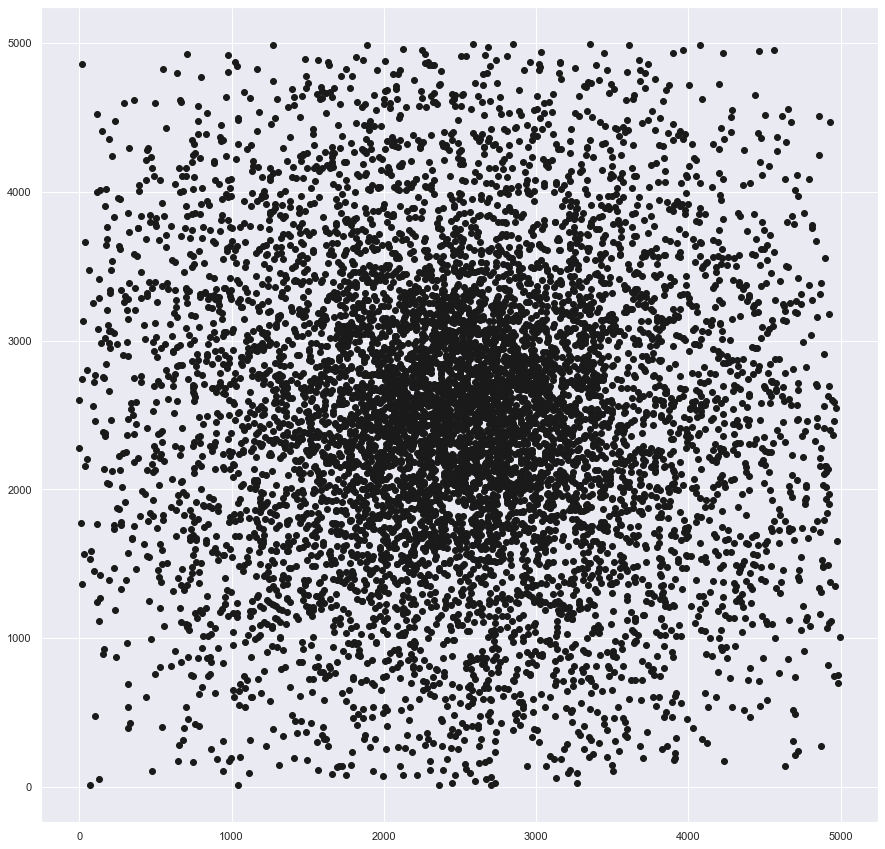

In [9]:
plt.plot(df_house['x'],df_house['y'],'ko')

<AxesSubplot:xlabel='x', ylabel='y'>

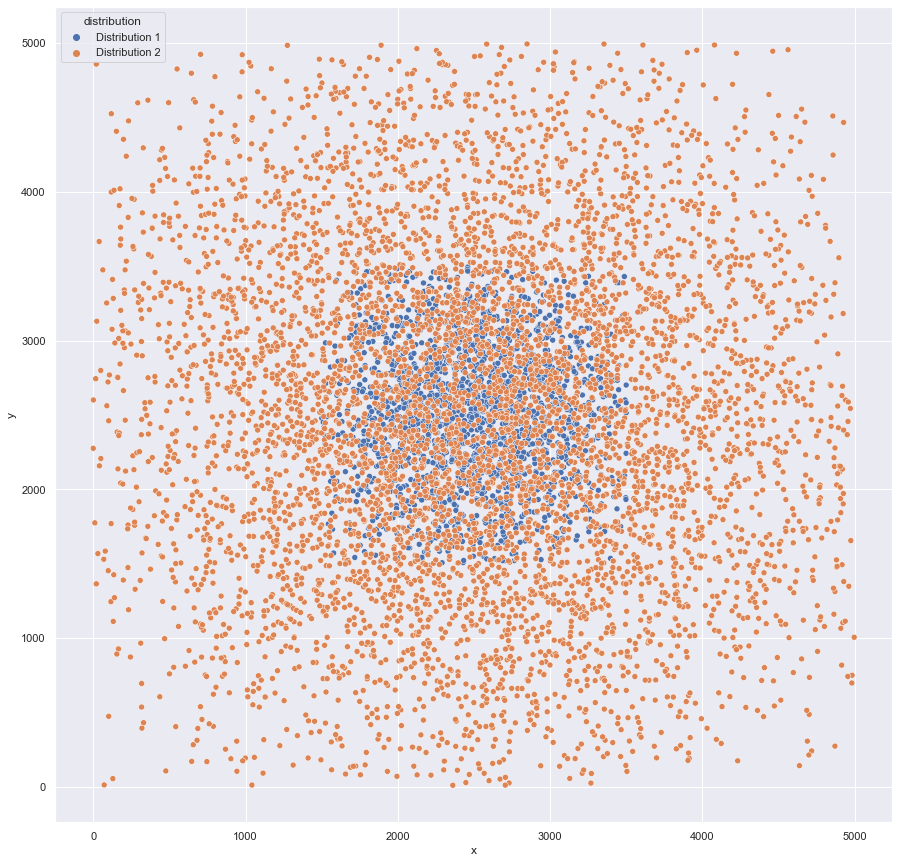

In [10]:
sns.scatterplot(data=df_house, x='x', y='y',hue='distribution',palette="deep")

In [11]:
bank_data = {'name':['A','B','C','D','E'],'x':[2000,4200,3500,1000,700],
        'y':[2500,4000,500,4200,500]}
df_bank = pd.DataFrame(bank_data) 

In [12]:
df_bank.head()

,name,x,y
0,A,2000,2500
1,B,4200,4000
2,C,3500,500
3,D,1000,4200
4,E,700,500


In [13]:
df_bank['distribution'] = 'Constant'

df_house['type']='house'
df_bank['type']='bank'

df_house['marker_size'] = 5
df_bank['marker_size']=200


In [14]:
df_all = pd.concat([df_house, df_bank[['x','y','distribution','type','marker_size']]], ignore_index=True)

In [15]:
df_all

,x,y,distribution,type,marker_size
0,2987.779594,3025.692961,Distribution 1,house,5
1,2046.886125,2682.102728,Distribution 1,house,5
2,2555.025918,2473.375049,Distribution 1,house,5
3,2685.836639,1868.064605,Distribution 1,house,5
4,2550.718037,2108.855146,Distribution 1,house,5
...,...,...,...,...,...
8000,2000.000000,2500.000000,Constant,bank,200
8001,4200.000000,4000.000000,Constant,bank,200
8002,3500.000000,500.000000,Constant,bank,200
8003,1000.000000,4200.000000,Constant,bank,200


<AxesSubplot:xlabel='x', ylabel='y'>

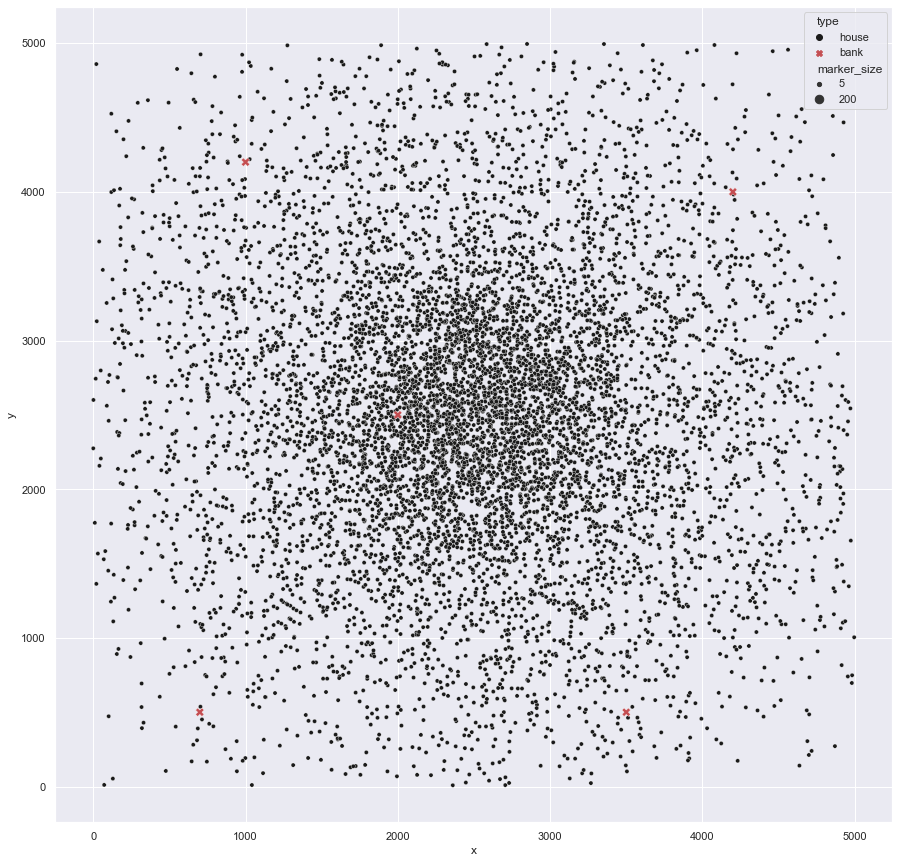

In [16]:
sns.scatterplot(data=df_all, x="x", y="y", hue="type",style='type',size='marker_size',palette={'bank':'r','house':'k'})

In [17]:
# import math
# df.apply(lambda x: math.dist(x,bank_df), axis=1, result_type='broadcast')
# df['A_distance']=math.dist(bank_df[bank_df['name']=='A'][['x','y']])

# from scipy.spatial import distance
# distance.euclidean(bank_df[bank_df['name']=='A'][['x','y']],df.iloc[1][['x','y']])

# =df.apply(lambda x: distance.euclidean(bank_df[bank_df['name']=='A'][['x','y']],x[['x','y']]), axis=1)

In [17]:
df_house['point'] = list(zip(df_house.x , df_house.y))
df_bank['point'] = list(zip(df_bank.x , df_bank.y))

In [18]:
df_bank
df_house

,x,y,distribution,type,marker_size,point
0,2987.779594,3025.692961,Distribution 1,house,5,"(2987.7795935347535, 3025.6929613109196)"
1,2046.886125,2682.102728,Distribution 1,house,5,"(2046.8861251747517, 2682.102728235351)"
2,2555.025918,2473.375049,Distribution 1,house,5,"(2555.025917594764, 2473.375048930382)"
3,2685.836639,1868.064605,Distribution 1,house,5,"(2685.8366391911604, 1868.0646050845403)"
4,2550.718037,2108.855146,Distribution 1,house,5,"(2550.7180367411593, 2108.8551460179824)"
...,...,...,...,...,...,...
7995,2102.312030,3723.134108,Distribution 2,house,5,"(2102.3120296995744, 3723.13410821064)"
7996,1983.215539,2208.959443,Distribution 2,house,5,"(1983.2155387634828, 2208.9594426837507)"
7997,2404.111236,2244.559088,Distribution 2,house,5,"(2404.1112357907405, 2244.559088162829)"
7998,1574.437700,4138.289961,Distribution 2,house,5,"(1574.4376996824508, 4138.289961050339)"


In [19]:
from scipy.spatial import distance
distance_matrix = distance.cdist(df_house[['x','y']],df_bank[['x','y']])
df_house['closest_bank_distance'] = distance_matrix.min(axis=1)
df_house['closest_bank_index'] = distance_matrix.argmin(axis=1)
df_house['closest_bank_name'] = list(df_bank.iloc[df_house['closest_bank_index']]['name'])

<AxesSubplot:xlabel='x', ylabel='y'>

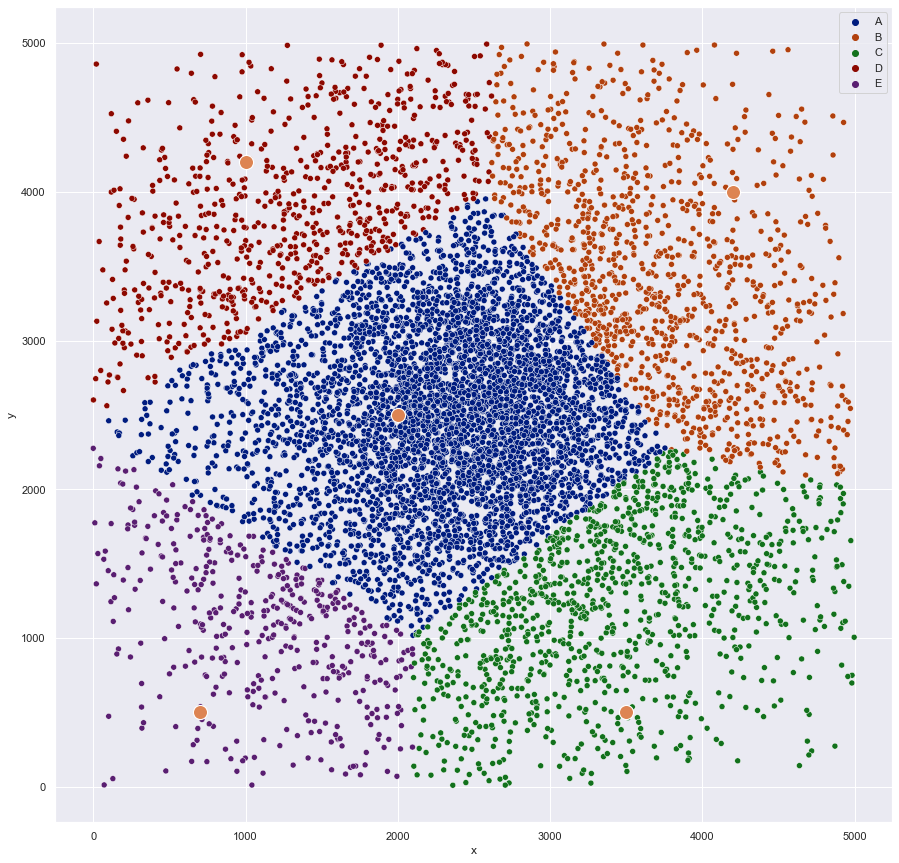

In [20]:
sns.scatterplot(data=df_house, x="x", y="y", hue="closest_bank_name",legend="full",palette='dark')
sns.scatterplot(data=df_bank,x='x',y='y',s=200)

In [21]:
def condition(x):
    if x<500:
        return 1
    elif x>=500 and x<1000:
        return 3
    else:
        return 5
df_house['cost'] = df_house['closest_bank_distance'].apply(condition)


In [22]:
df_house

,x,y,distribution,type,marker_size,point,closest_bank_distance,closest_bank_index,closest_bank_name,cost
0,2987.779594,3025.692961,Distribution 1,house,5,"(2987.7795935347535, 3025.6929613109196)",1118.955591,0,A,5
1,2046.886125,2682.102728,Distribution 1,house,5,"(2046.8861251747517, 2682.102728235351)",188.041784,0,A,1
2,2555.025918,2473.375049,Distribution 1,house,5,"(2555.025917594764, 2473.375048930382)",555.664159,0,A,3
3,2685.836639,1868.064605,Distribution 1,house,5,"(2685.8366391911604, 1868.0646050845403)",932.584709,0,A,3
4,2550.718037,2108.855146,Distribution 1,house,5,"(2550.7180367411593, 2108.8551460179824)",675.488455,0,A,3
...,...,...,...,...,...,...,...,...,...,...
7995,2102.312030,3723.134108,Distribution 2,house,5,"(2102.3120296995744, 3723.13410821064)",1201.038255,3,D,5
7996,1983.215539,2208.959443,Distribution 2,house,5,"(1983.2155387634828, 2208.9594426837507)",291.524140,0,A,1
7997,2404.111236,2244.559088,Distribution 2,house,5,"(2404.1112357907405, 2244.559088162829)",478.075256,0,A,1
7998,1574.437700,4138.289961,Distribution 2,house,5,"(1574.4376996824508, 4138.289961050339)",577.742849,3,D,3


In [23]:
df_map =  df_house[['x','y','cost']]

In [24]:
df_map = df_map.round()
df_map = df_map.groupby(by=['x','y']).agg(avg_cost=('cost','mean'))

In [35]:
df_map[~df_map.avg_cost.isin([1,3,5])]

,,avg_cost
x,y,


In [25]:
df_map=df_map.reset_index()
df_map['y']=df_map['y'].astype('int')
df_map['x']=df_map['x'].astype('int')
rowIDs = df_map['y']
colIDs = df_map['x']

# Setup image array and set values into it from "grumpiness" column
A = np.zeros((5000,5000))
A[rowIDs,colIDs] = df_map['avg_cost']

In [26]:
x = df_map['x']
y = df_map ['y']
z= df_map['avg_cost']
# z = f (x,y)

In [27]:
from scipy import interpolate
f = interpolate.interp2d(x, y, z, kind='cubic')

In [29]:
indices = np.argwhere(A ==0)

In [33]:
A1 = A[A == 0]

In [35]:
A1.shape

(24992002,)

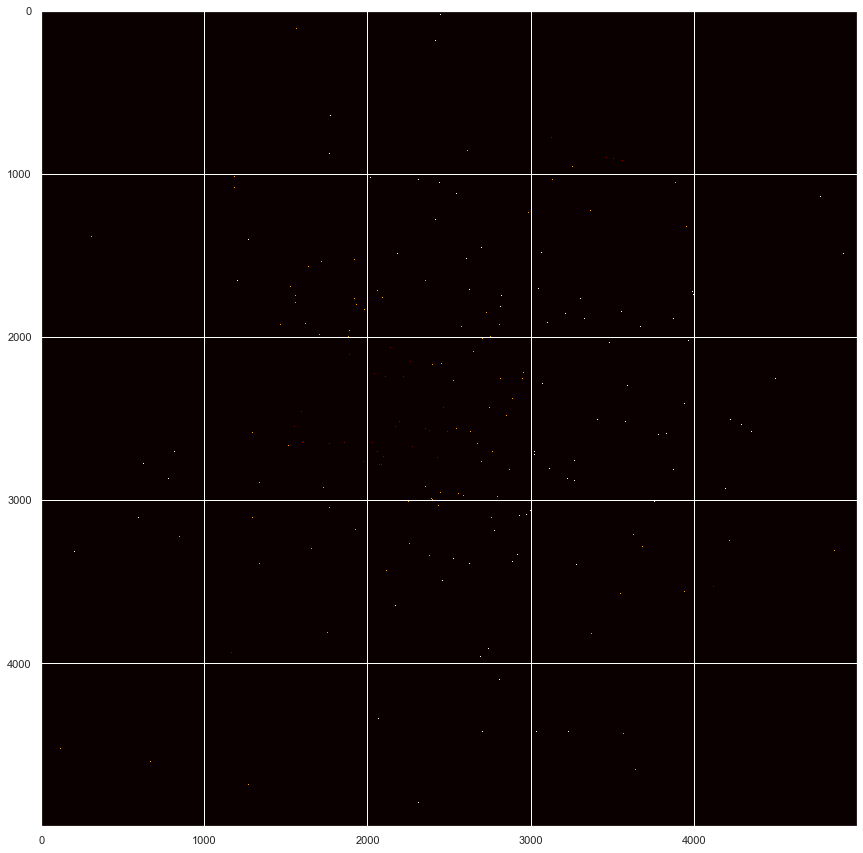

In [36]:
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:>

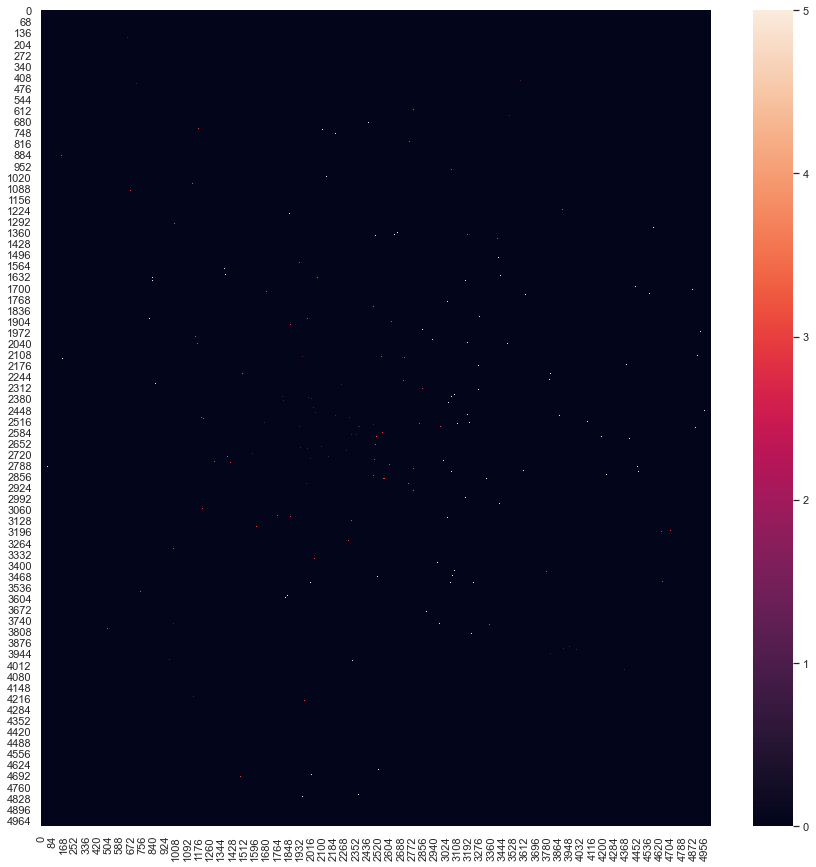

In [37]:
sns.heatmap(A)

In [38]:
xnew = np.arange(1, 5000, 1, dtype=int)
ynew = np.arange(1, 5000, 1,dtype=int)
# A_interpolate = 

In [39]:
A_interpolate = f(xnew,ynew)

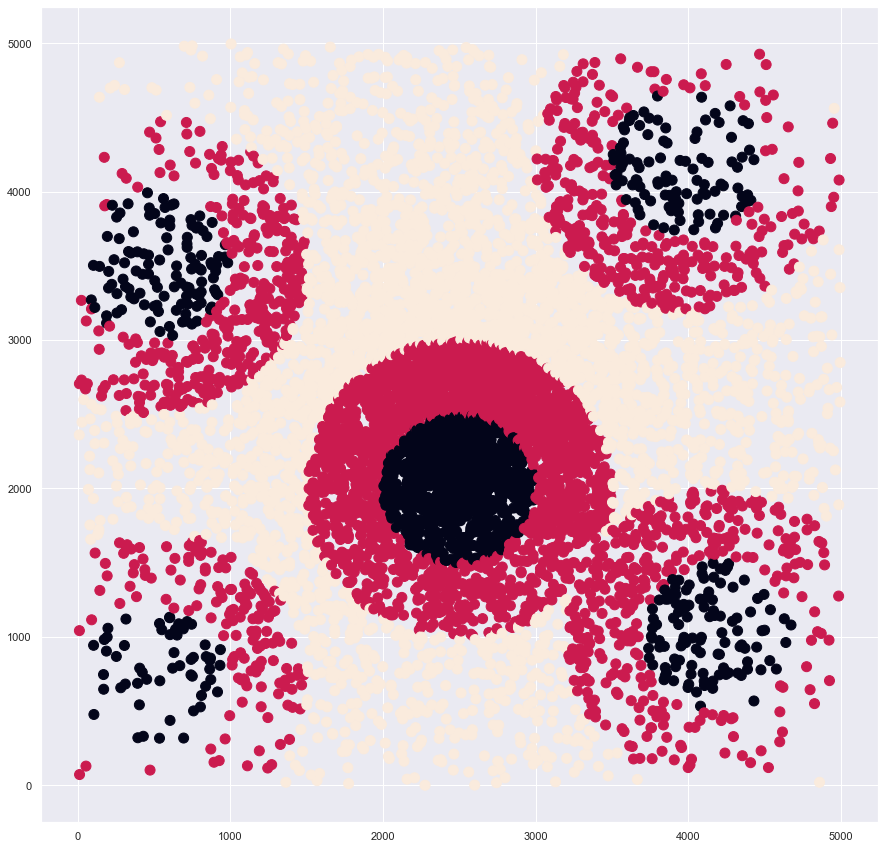

In [42]:
x_index,y_index = A.nonzero()
plt.scatter(x_index,y_index,s=100,c=A[x_index,y_index])

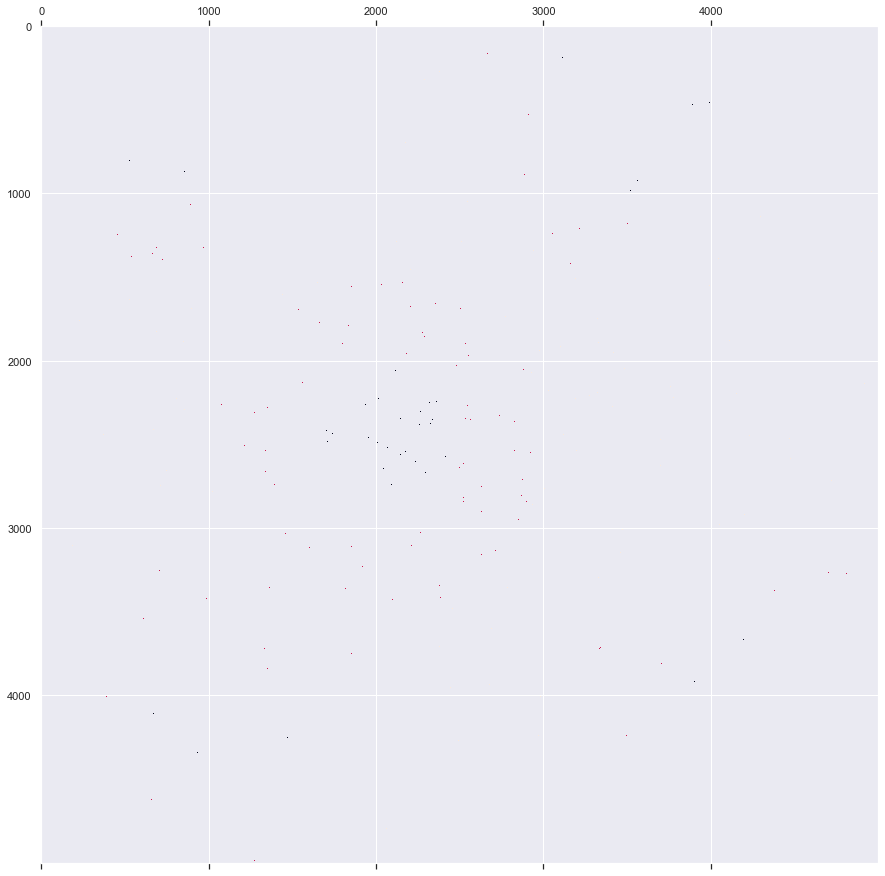

In [43]:
A[A==0.0]=np.nan
plt.matshow(A,aspect='auto')

In [53]:
X,Y=np.meshgrid(x,y)

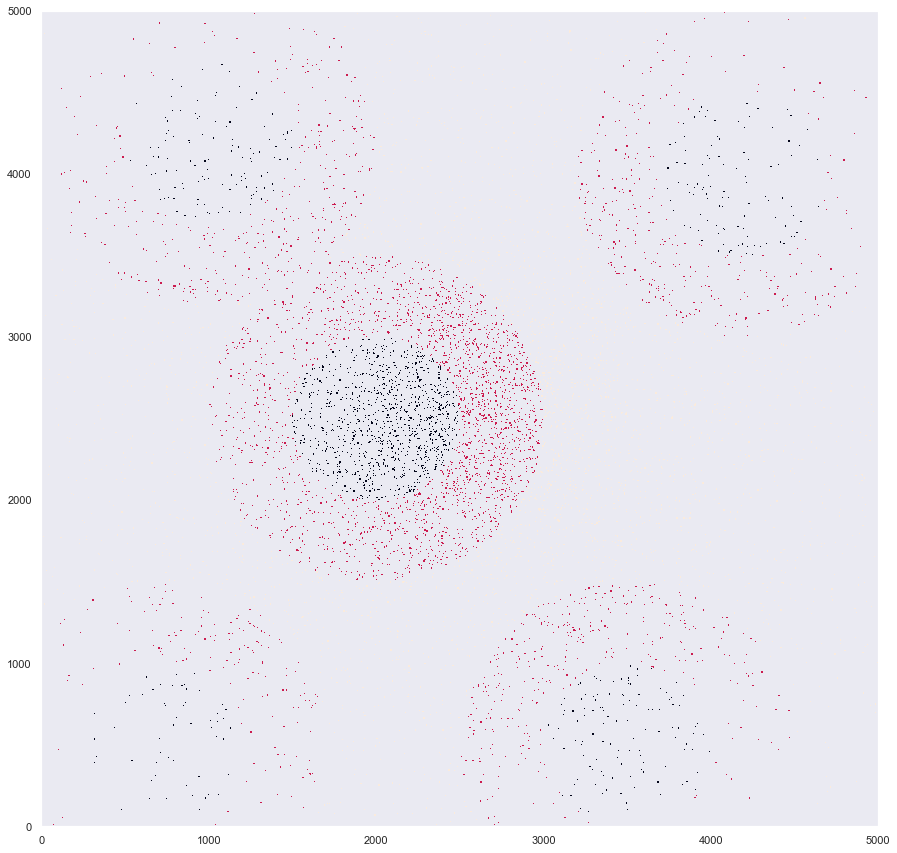

In [55]:
plt.pcolormesh(A)

In [56]:
from scipy import stats
ret = stats.binned_statistic_2d(x, y, z, 'mean', bins=[50, 50])

In [64]:
A2=ret.statistic

In [62]:
ret.binnumber.shape

(7998,)

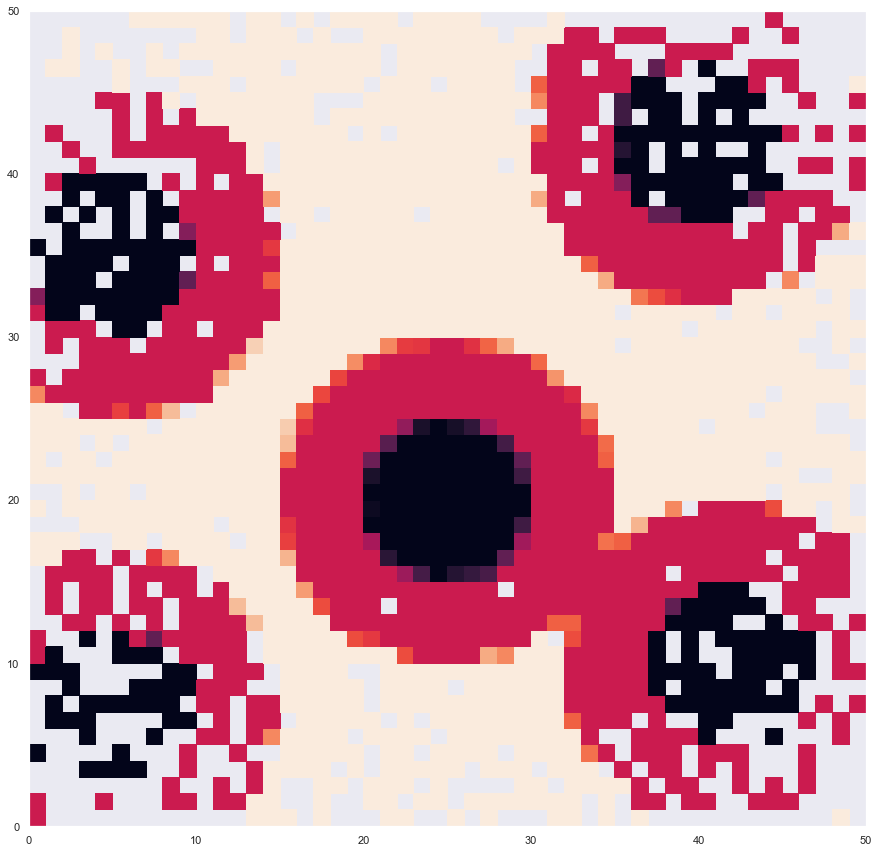

In [65]:
plt.pcolormesh(A2)

<AxesSubplot:>

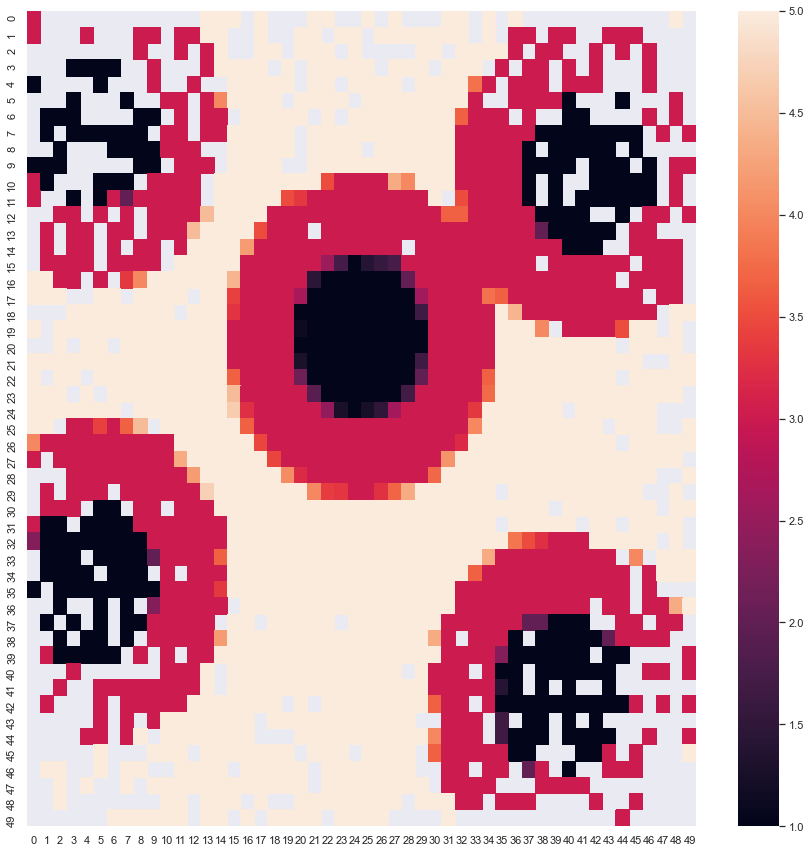

In [66]:
sns.heatmap(A2)

In [67]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [68]:
x = df_map['x']
y = df_map ['y']
z= df_map['avg_cost']
g=NormalizeData(z)
binned = stats.binned_statistic_2d(x, y, g, 'mean', bins=[50, 50])

In [69]:
heatmap_goodness=binned.statistic

<AxesSubplot:>

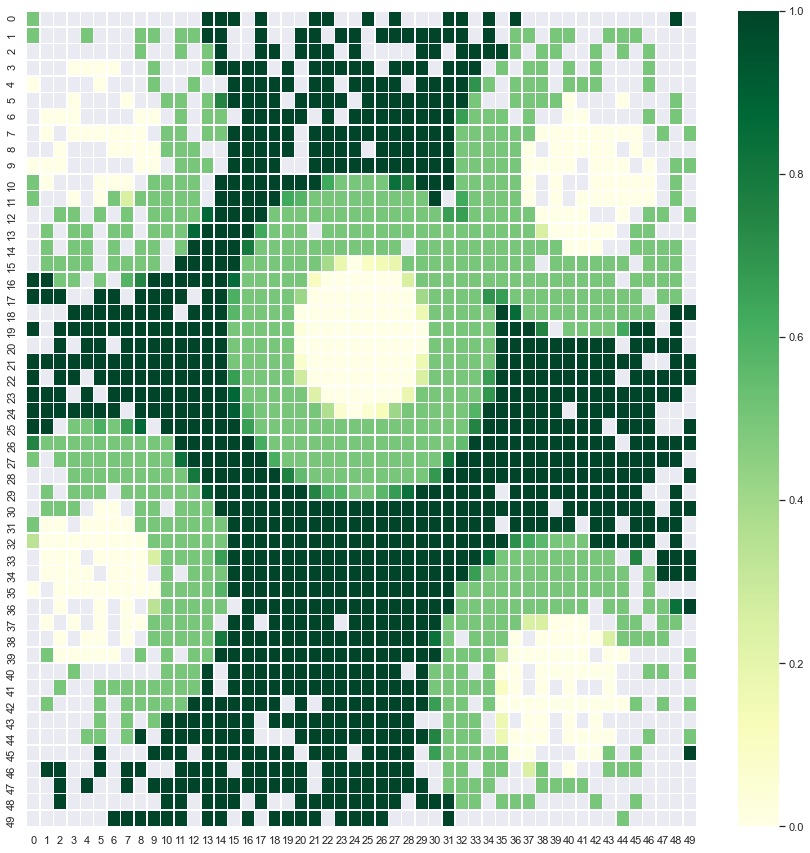

In [81]:
sns.heatmap(heatmap_goodness,cmap='YlGn', linewidths=.5)

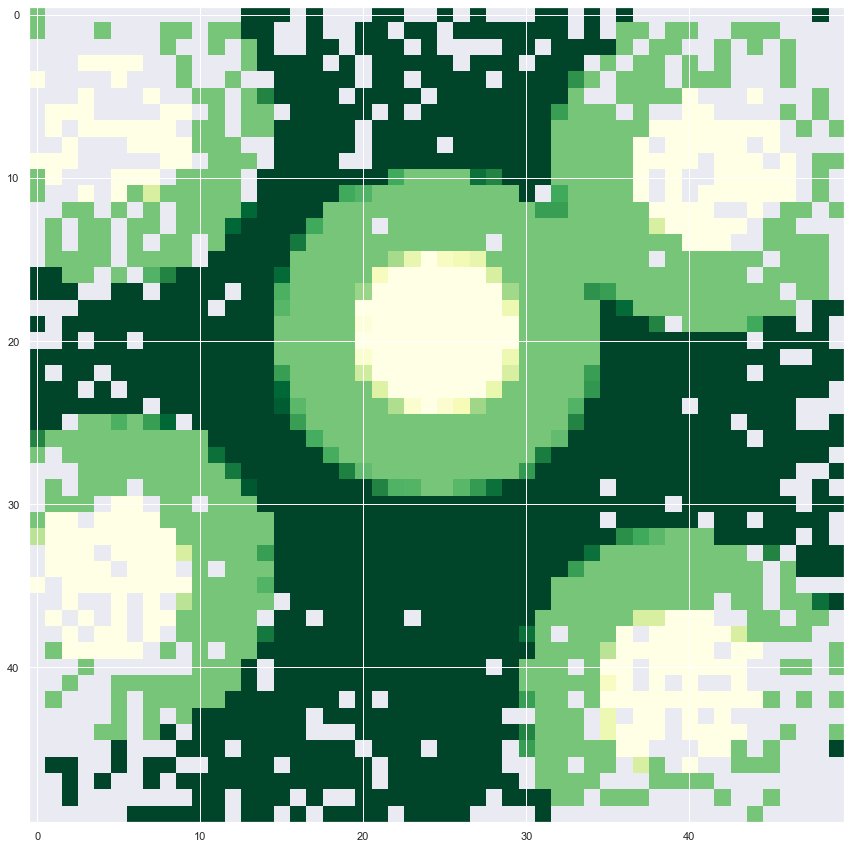

In [80]:
plt.imshow(heatmap_goodness, interpolation='antialiased',cmap='YlGn')
plt.show()